In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

In [2]:
csvpath = Path("whale_returns.csv")

In [3]:
# Reading whale returns
whale_returns_csv = Path("whale_returns.csv")
whale_returns_csv = pd.read_csv('whale_returns.csv', index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns_csv.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
whale_returns_csv.isnull().values.any()

True

In [5]:
# Check for nulls
whale_returns_csv.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop missing values
whale_returns_csv = whale_returns_csv.dropna()

In [7]:
# Validate no more missing values
whale_returns_csv.isnull().sum()
whale_returns_csv.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [8]:
# Reading algo returns
algo_returns_csv = Path("algo_returns.csv")
algo_returns_csv = pd.read_csv('algo_returns.csv', index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns_csv.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [9]:
algo_returns_csv.isnull().values.any()

True

In [10]:
algo_returns_csv.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [11]:
# Drop missing values
algo_returns_csv = algo_returns_csv.dropna()

In [12]:
# Validate no more missing values
algo_returns_csv.isnull().sum()
algo_returns_csv.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [13]:
# Reading sp500 returns
sp500_history_csv = Path("sp500_history.csv")
sp500_history_csv = pd.read_csv('sp500_history.csv', index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history_csv = sp500_history_csv.sort_index()

sp500_history_csv.head()

,Close
Date,
2012-10-01,"$1,444.49"
2012-10-02,"$1,445.75"
2012-10-03,"$1,450.99"
2012-10-04,"$1,461.40"
2012-10-05,"$1,460.93"


In [14]:
# Clean identified numeric fields with $ symbol 
sp500_history_csv['Close'] = sp500_history_csv['Close'].str.replace("$", "").str.replace(",", "")
sp500_history_csv.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [15]:
# Check Data Types
sp500_history_csv.dtypes

Close    object
dtype: object

In [16]:
 # Convert `Close` from `object` to `float`
sp500_history_csv["Close"] = sp500_history_csv["Close"].astype("float")
sp500_history_csv.dtypes

Close    float64
dtype: object

In [17]:
# Calculate the daily return over the last 10 years
daily_return = sp500_history_csv.pct_change()
daily_return.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [18]:
# Drop nulls
# daily_return.isnull().sum()
daily_return = daily_return.dropna()
daily_return.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [19]:
# Rename Column   S&P 500
daily_return = daily_return.rename(columns={'Close':'S&P 500'})
daily_return.tail()
                                                      

,S&P 500
Date,
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579
2019-04-22,0.001012
2019-04-23,0.008841


In [20]:
 # Concatenate all DataFrames into a single DataFrame    Combine Whale, Algorithmic, and S&P 500 Returns
combined_df = pd.concat([whale_returns_csv,algo_returns_csv,daily_return], axis='columns', join='inner')
combined_df.sort_index(inplace=True)
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


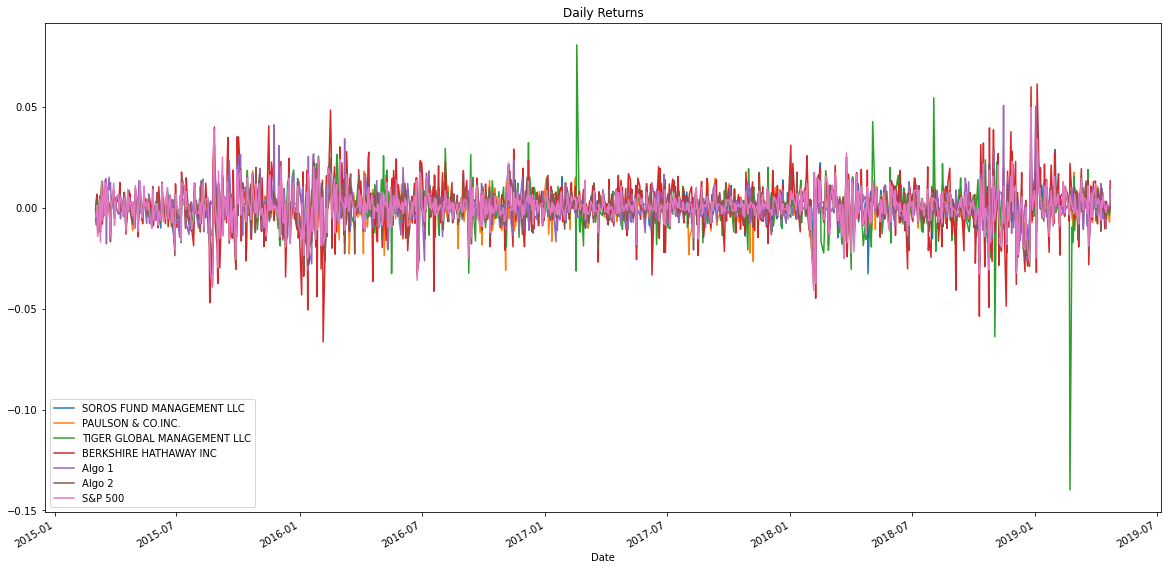

In [21]:
# Plot daily returns  Performance calculate and plot the daily returns and cumulative returns, does any portfolio outperform the S&P 500?
combined_df.plot(figsize=(20,10),title="Daily Returns");

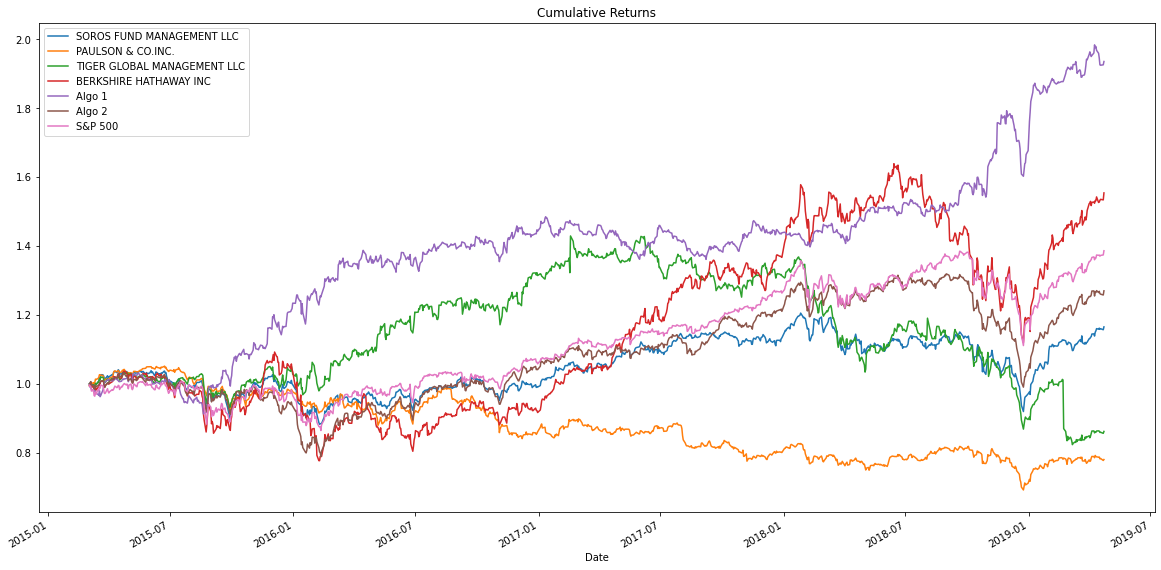

In [22]:
 # Plot cumulative returns
cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.plot(figsize=(20,10),title="Cumulative Returns");

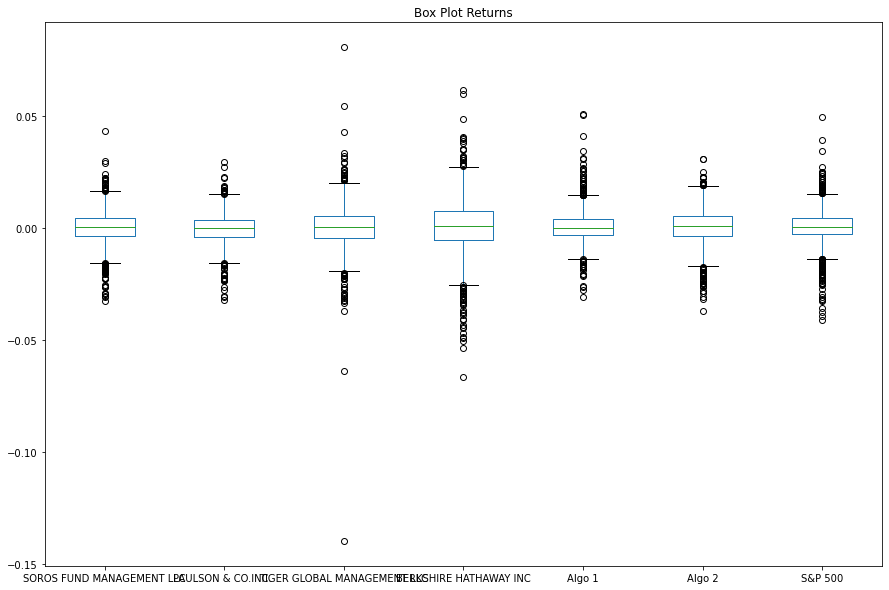

In [23]:
# Box plot to visually show risk for each portfolio
combined_df.plot.box(figsize=(15,10),title="Box Plot Returns");

In [24]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
combined_df.std().sort_values()

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
S&P 500                        0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [25]:
# Determine which portfolios are riskier than the S&P 500
#calculate S&P STD
sp500risk = combined_df['S&P 500'].std()
#make checking logic on what is riskier than S&P
combined_df.std() > sp500risk

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [26]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = combined_df.std() * np.sqrt(252)
annual_std
                        

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

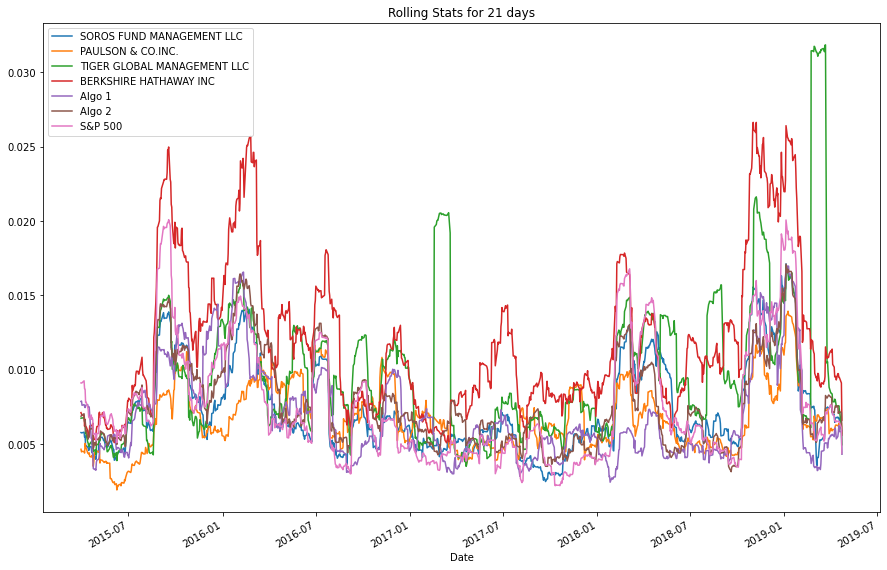

In [27]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
combined_df_roll_std = combined_df.rolling(window=21).std()

combined_df_roll_std.plot(figsize=(15,10),title="Rolling Stats for 21 days");

In [28]:
# Construct a correlation table
corr_df = combined_df.corr()
corr_df.style.background_gradient(cmap='summer')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


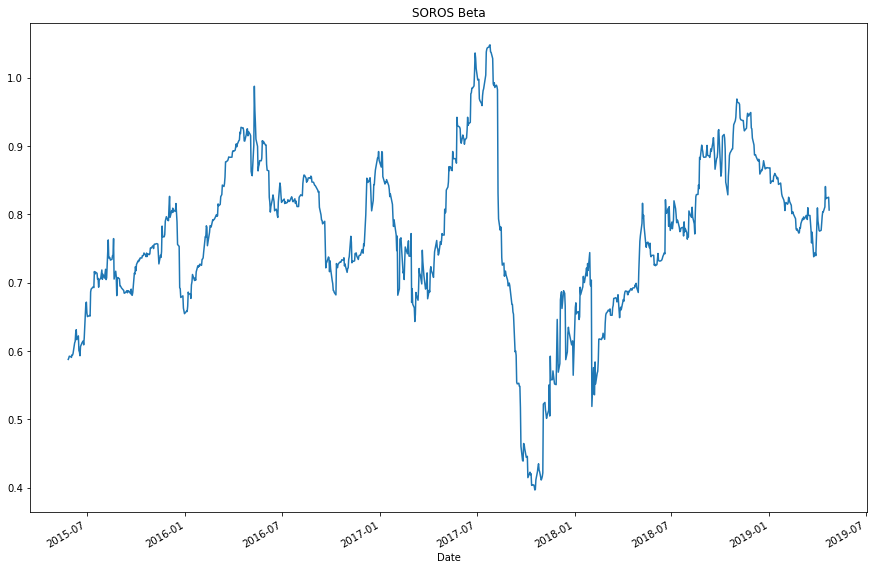

In [29]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
covariance = combined_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(combined_df['S&P 500'])

#variance of the general market
variance = combined_df['S&P 500'].rolling(window=60).var()

#get the beta
beta = covariance/variance

#plotting beta over time
beta.plot(figsize=(15,10), title="SOROS Beta");


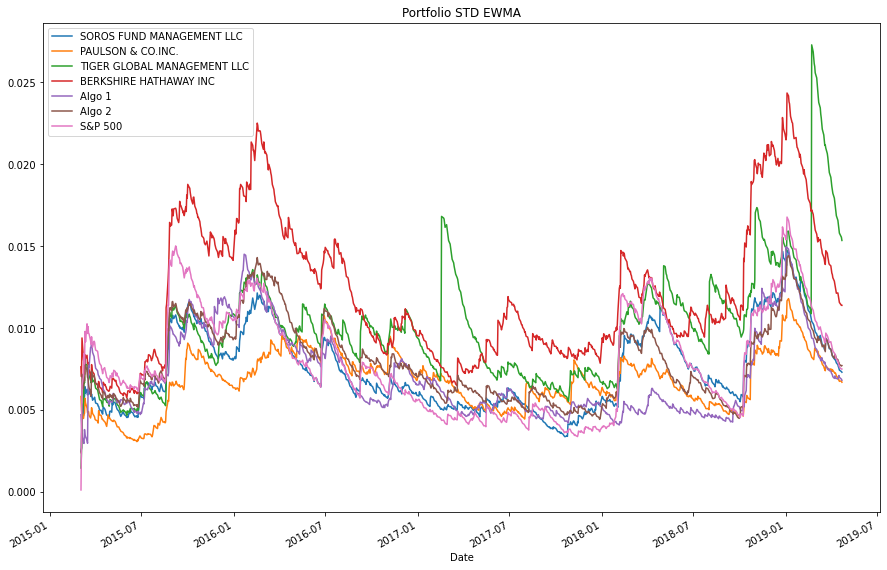

In [30]:
# Calculate a rolling window using the exponentially weighted moving average. 
combined_df.ewm(halflife=21).std().plot(figsize=(15,10), title="Portfolio STD EWMA");

In [31]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios.sort_values()

PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
SOROS FUND MANAGEMENT LLC      0.356417
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
S&P 500                        0.648267
Algo 1                         1.378649
dtype: float64

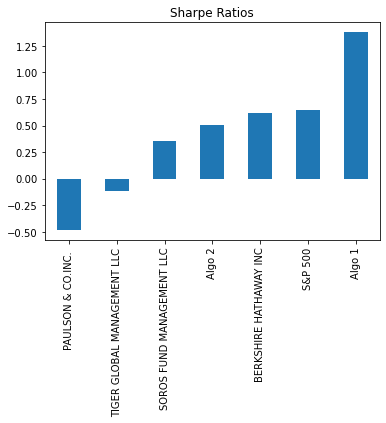

In [32]:
 # Visualize the sharpe ratios as a bar plot
sharpe_ratios.sort_values().plot(kind='bar', title='Sharpe Ratios');

In [33]:
# df["Date"] = df["Date"].dt.date

In [34]:
#  On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

In [35]:
#  Portfolio Returns
#In this section, you will build your own portfolio of stocks, calculate the returns,  compare the results to the Whale Portfolios and the S&P 500.
#Visit Google Sheets, use the inbuilt Google Finance function to choose 3-5 stocks for your own portfolio.
#=GOOGLEFINANCE("FB", "price", "2/12/2019", "5/14/2019", "DAILY")   Sat. Oct. 31st class.  
#download CSV files, calculate the portfolio returns.
#calculate what returns for each stock.
#Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
#Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?

In [36]:
# Reading in NFLX 
csvpath = Path("NFLX.csv")
NFLX_csv = Path("NFLX.csv")
NFLX_csv = pd.read_csv('NFLX.csv', index_col="Date", parse_dates=True, infer_datetime_format=True)
NFLX_csv.head()

,Close
Date,
2015-03-02 16:00:00,68.61
2015-03-03 16:00:00,67.82
2015-03-04 16:00:00,67.11
2015-03-05 16:00:00,66.81
2015-03-06 16:00:00,64.87


In [37]:
NFLX_csv.index = NFLX_csv.index.strftime('%Y-%m-%d')
NFLX_csv.head()

,Close
Date,
2015-03-02,68.61
2015-03-03,67.82
2015-03-04,67.11
2015-03-05,66.81
2015-03-06,64.87


In [38]:
# Check for nulls
NFLX_csv.isnull().sum()

Close    0
dtype: int64

In [39]:
# Check Data Types
NFLX_csv.dtypes

Close    float64
dtype: object

In [40]:
# Calculate the daily returns
daily_return_NFLX = NFLX_csv.pct_change()
daily_return_NFLX.head()

,Close
Date,
2015-03-02,NaN
2015-03-03,-0.011514
2015-03-04,-0.010469
2015-03-05,-0.004470
2015-03-06,-0.029038


In [41]:
# Drop nulls
# daily_return.isnull().sum()
daily_return_NFLX = daily_return_NFLX.dropna()
daily_return_NFLX.head()

,Close
Date,
2015-03-03,-0.011514
2015-03-04,-0.010469
2015-03-05,-0.004470
2015-03-06,-0.029038
2015-03-09,-0.018653


In [42]:
# Rename Column   NFLX
daily_return_NFLX = daily_return_NFLX.rename(columns={'Close':'NFLX'})
daily_return_NFLX.head()

,NFLX
Date,
2015-03-03,-0.011514
2015-03-04,-0.010469
2015-03-05,-0.004470
2015-03-06,-0.029038
2015-03-09,-0.018653


In [43]:
# Reading in PFE
csvpath = Path("PFE.csv")
PFE_csv = Path("PFE.csv")
PFE_csv = pd.read_csv('PFE.csv', index_col="Date", parse_dates=True, infer_datetime_format=True)
PFE_csv.head()

,Close
Date,
2015-03-02 16:00:00,34.77
2015-03-03 16:00:00,34.56
2015-03-04 16:00:00,34.64
2015-03-05 16:00:00,34.47
2015-03-06 16:00:00,33.97


In [44]:
PFE_csv.index = PFE_csv.index.strftime('%Y-%m-%d')
PFE_csv.head()

,Close
Date,
2015-03-02,34.77
2015-03-03,34.56
2015-03-04,34.64
2015-03-05,34.47
2015-03-06,33.97


In [45]:
# Calculate the daily returns
daily_return_PFE = PFE_csv.pct_change()
daily_return_PFE.head()

,Close
Date,
2015-03-02,NaN
2015-03-03,-0.006040
2015-03-04,0.002315
2015-03-05,-0.004908
2015-03-06,-0.014505


In [46]:
# Drop nulls
# daily_return.isnull().sum()
daily_return_PFE = daily_return_PFE.dropna()
daily_return_PFE.head()

,Close
Date,
2015-03-03,-0.006040
2015-03-04,0.002315
2015-03-05,-0.004908
2015-03-06,-0.014505
2015-03-09,0.001766


In [47]:
# Rename Column   PFE
daily_return_PFE = daily_return_PFE.rename(columns={'Close':'PFE'})
daily_return_PFE.head()

,PFE
Date,
2015-03-03,-0.006040
2015-03-04,0.002315
2015-03-05,-0.004908
2015-03-06,-0.014505
2015-03-09,0.001766


In [48]:
# Reading in SPY
csvpath = Path("SPY.csv")
SPY_csv = Path("SPY.csv")
SPY_csv = pd.read_csv('SPY.csv', index_col="Date", parse_dates=True, infer_datetime_format=True)
SPY_csv.head()

,Close
Date,
2015-03-02 16:00:00,211.99
2015-03-03 16:00:00,211.12
2015-03-04 16:00:00,210.23
2015-03-05 16:00:00,210.46
2015-03-06 16:00:00,207.50


In [49]:
SPY_csv.index = SPY_csv.index.strftime('%Y-%m-%d')
SPY_csv.head()

,Close
Date,
2015-03-02,211.99
2015-03-03,211.12
2015-03-04,210.23
2015-03-05,210.46
2015-03-06,207.50


In [50]:
# Calculate the daily returns
daily_return_SPY = SPY_csv.pct_change()
daily_return_SPY.head()

,Close
Date,
2015-03-02,NaN
2015-03-03,-0.004104
2015-03-04,-0.004216
2015-03-05,0.001094
2015-03-06,-0.014064


In [51]:
# Drop nulls
# daily_return.isnull().sum()
daily_return_SPY = daily_return_SPY.dropna()
daily_return_SPY.head()

,Close
Date,
2015-03-03,-0.004104
2015-03-04,-0.004216
2015-03-05,0.001094
2015-03-06,-0.014064
2015-03-09,0.004145


In [52]:
# Rename Column   SPY
daily_return_SPY = daily_return_SPY.rename(columns={'Close':'SPY'})
daily_return_SPY.head()

,SPY
Date,
2015-03-03,-0.004104
2015-03-04,-0.004216
2015-03-05,0.001094
2015-03-06,-0.014064
2015-03-09,0.004145


In [53]:
#Your analysis should include the following:

#Using all portfolios:
#The annualized standard deviation (252 trading days) for all portfolios.
#The plotted rolling standard deviation using a 21 trading day window for all portfolios.
#The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
#A correlation table.


#Using your custom portfolio and one other of your choosing:
#The plotted beta. 

In [54]:
#Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [72]:
# Concatenate all stocks into a single DataFrame
 # Concatenate all DataFrames into a single DataFrame    Combine Whale, Algorithmic, and S&P 500 Returns
my_port_df = pd.concat([daily_return_NFLX,daily_return_PFE,daily_return_SPY], axis='columns', join='inner')
my_port_df.sort_index(inplace=True)
my_port_df.head()

,NFLX,PFE,SPY
Date,,,
2015-03-03,-0.011514,-0.006040,-0.004104
2015-03-04,-0.010469,0.002315,-0.004216
2015-03-05,-0.004470,-0.004908,0.001094
2015-03-06,-0.029038,-0.014505,-0.014064
2015-03-09,-0.018653,0.001766,0.004145


In [73]:
# Drop Nulls

my_port_df = my_port_df.dropna()
my_port_df.head()

,NFLX,PFE,SPY
Date,,,
2015-03-03,-0.011514,-0.006040,-0.004104
2015-03-04,-0.010469,0.002315,-0.004216
2015-03-05,-0.004470,-0.004908,0.001094
2015-03-06,-0.029038,-0.014505,-0.014064
2015-03-09,-0.018653,0.001766,0.004145


In [74]:
#Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [75]:
 # Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
my_port_df = my_port_df.dot(weights)
my_port_df.head()

Date
2015-03-03   -0.007219
2015-03-04   -0.004123
2015-03-05   -0.002761
2015-03-06   -0.019202
2015-03-09   -0.004247
dtype: float64

In [76]:
#  Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [77]:
combined_df['Custom'] = my_port_df
combined_df.head()

,0,Algo 1,Algo 2,BERKSHIRE HATHAWAY INC,PAULSON & CO.INC.,S&P 500,SOROS FUND MANAGEMENT LLC,TIGER GLOBAL MANAGEMENT LLC,Custom
Date,,,,,,,,,
2015-03-03 00:00:00,NaN,-0.001942,-0.000949,-0.006569,-0.004981,-0.004539,-0.001266,-0.000496,NaN
2015-03-04 00:00:00,NaN,-0.008589,0.002416,0.004213,0.003241,-0.004389,0.002230,-0.002534,NaN
2015-03-05 00:00:00,NaN,-0.000955,0.004323,0.006726,0.004076,0.001196,0.004016,0.002355,NaN
2015-03-06 00:00:00,NaN,-0.004957,-0.011460,-0.013098,-0.003574,-0.014174,-0.007905,-0.008481,NaN
2015-03-09 00:00:00,NaN,-0.005447,0.001303,-0.001652,0.004225,0.003944,0.000582,0.005843,NaN


In [62]:
# Risk
# Determine which portfolios are riskier than the Custom
#calculate Custom STD
Customrisk = combined_df['Custom'].std()
#make checking logic on what is riskier than S&P
combined_df.std() > Customrisk

KeyError: 'Custom'

In [ ]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = combined_df.std() * np.sqrt(252)
annual_std
                        

In [ ]:
# Rolling
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
combined_df_roll_std = combined_df.rolling(window=21).std()

combined_df_roll_std.plot(figsize=(15,10),title="Rolling Stats for 21 days");

In [ ]:
# Annualized Sharpe Ratios
# Calculate annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios.sort_values()

In [ ]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.sort_values().plot(kind='bar', title='Sharpe Ratios');

In [ ]:
 # Create a correlation analysis
# Construct a correlation table
corr_df = combined_df.corr()
corr_df.style.background_gradient(cmap='summer')

In [ ]:
# Beta
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
covariance = combined_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(combined_df['S&P 500'])

#variance of the general market
variance = combined_df['S&P 500'].rolling(window=60).var()

#get the beta
beta = covariance/variance

#plotting beta over time
beta.plot(figsize=(15,10), title="SOROS Beta");
